# EDA Case Study Answers

 Imagine you're a detective trying to solve a case. The sales at ShopEase have been like a rollercoaster, going up and down every month. Can you chart this fluctuating journey and identify any seasonal patterns that might explain these ups and downs?

### The sales at MotionEase have been like a rollercoaster, going up and down every month. Can you chart this fluctuating journey and identify any seasonal patterns that might explain these ups and downs?

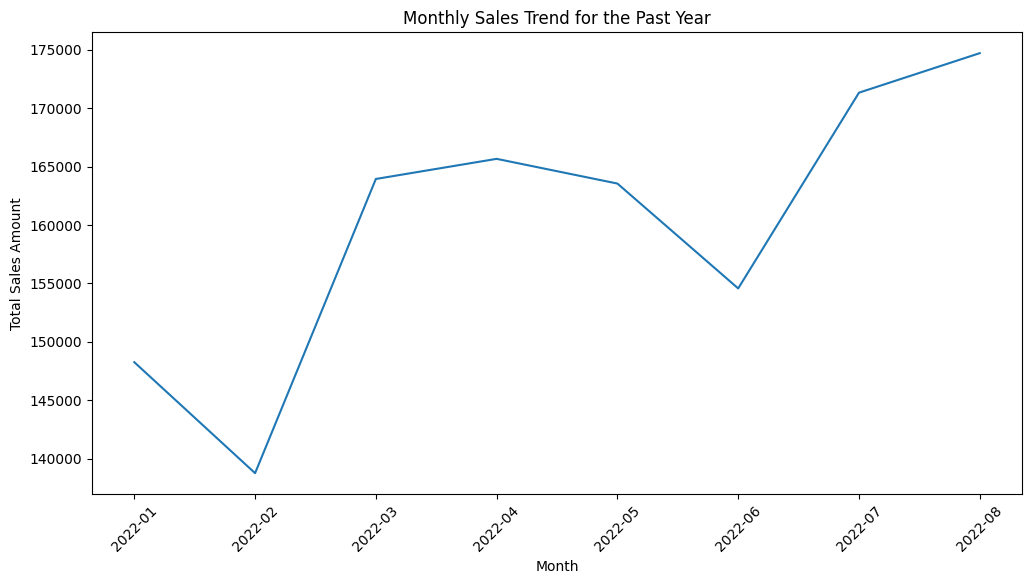

In [15]:
# Import necessary libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv("/content/ShopEase_Sales_Data.csv")


# Convert 'OrderDate' to datetime format
df['OrderDate'] = pd.to_datetime(df['OrderDate'])

# Extract the month and year from 'OrderDate'
df['YearMonth'] = df['OrderDate'].dt.to_period('M')

# Convert 'YearMonth' to string format
df['YearMonth'] = df['YearMonth'].astype(str)

# Filter data for the past year
last_year_data = df[df['OrderDate'] >= '2022-01-01']

# Aggregate sales data by month for the past year
last_year_monthly_sales = last_year_data.groupby('YearMonth')['TotalAmount'].sum().reset_index()

# Plotting the monthly sales for the past year
plt.figure(figsize=(12, 6))
sns.lineplot(x='YearMonth', y='TotalAmount', data=last_year_monthly_sales)
plt.title('Monthly Sales Trend for the Past Year')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.show()


### It's a busy week at MotionEase, but is every day equally busy? Your task is to find out if weekdays bring in more sales than weekends or vice versa. This could help the company in planning their staffing and marketing strategies.

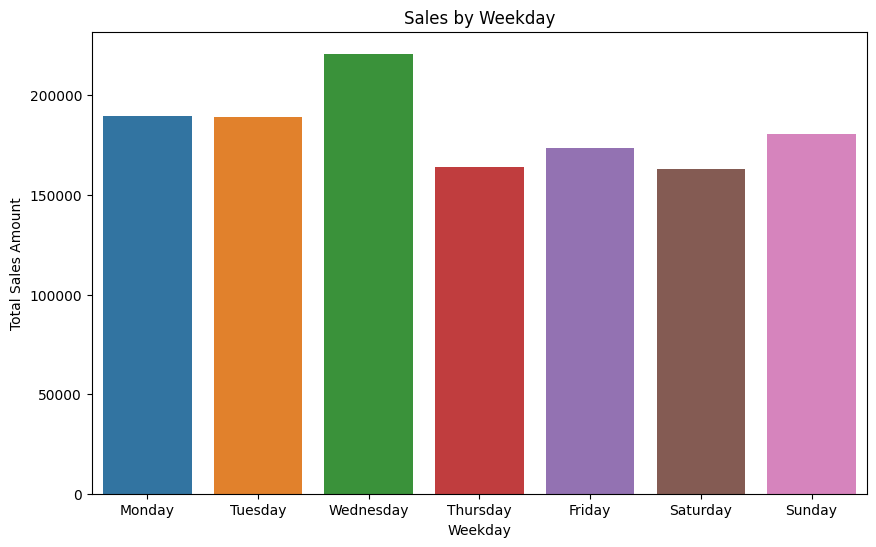

In [16]:
# Extract the day of the week from 'OrderDate'
df['Weekday'] = df['OrderDate'].dt.day_name()

# Aggregate sales data by weekday
weekday_sales = df.groupby('Weekday')['TotalAmount'].sum().reset_index()

# Sort the data by weekday
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_sales['Weekday'] = pd.Categorical(weekday_sales['Weekday'], categories=weekday_order, ordered=True)
weekday_sales = weekday_sales.sort_values('Weekday')

# Plotting the weekday sales
plt.figure(figsize=(10, 6))
sns.barplot(x='Weekday', y='TotalAmount', data=weekday_sales)
plt.title('Sales by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Total Sales Amount')
plt.show()

### MotionEase wants to roll out a VIP program but isn't sure who to invite. Your task is to identify the top 10% of customers based on their spending. What makes these customers special?

In [18]:
# Aggregate sales data by customer
customer_sales = df.groupby('CustomerID')['TotalAmount'].sum().reset_index()

# Calculate the 90th percentile of customer spending
top_10_percentile_value = customer_sales['TotalAmount'].quantile(0.9)

# Identify the top 10% of customers based on their spending
top_10_percent_customers = customer_sales[customer_sales['TotalAmount'] >= top_10_percentile_value]

# Display the 'CustomerID' and 'TotalAmount' for the top 10% of customers
top_10_percent_customers[['CustomerID', 'TotalAmount']].head(10)

,CustomerID,TotalAmount
1,2,6352.64
3,4,9515.14
7,9,8867.89
8,10,7464.11
10,12,6130.85
12,14,6631.16
17,21,7048.61
34,40,8046.50
76,88,6770.81
82,97,8030.53


### In the vast inventory of MotionEase, some products are stars while others are not. Can you spotlight the top 5 best-selling products in each category and suggest why they might be the customer favorites?

In [19]:
# Aggregate sales data by product and category
product_sales_by_category = df.groupby(['Category', 'ProductName'])['Quantity'].sum().reset_index()

# Sort the data to get the top 5 best-selling products in each category
top_5_products_by_category = product_sales_by_category.sort_values(['Category', 'Quantity'], ascending=[True, False])
top_5_products_by_category = top_5_products_by_category.groupby('Category').head(5).reset_index(drop=True)

# Display the top 5 best-selling products in each category
top_5_products_by_category

,Category,ProductName,Quantity
0,Electronics,Product_297,18
1,Electronics,Product_309,16
2,Electronics,Product_326,16
3,Electronics,Product_295,15
4,Electronics,Product_284,14
5,Fashion,Product_228,14
6,Fashion,Product_390,14
7,Fashion,Product_148,12
8,Fashion,Product_248,12
9,Fashion,Product_174,11


###	Returns are a headache for any retail business. MotionEase is no exception. Your challenge is to identify products that are frequently returned and hypothesize why this might be happening.

In [20]:
# Filter data for returned orders
returned_orders = df[df['IsReturned'] == 1]

# Count the number of times each product is returned
returned_products_count = returned_orders.groupby('ProductName')['IsReturned'].count().reset_index()

# Sort the data to get the most frequently returned products
most_returned_products = returned_products_count.sort_values('IsReturned', ascending=False).head(10)

# Display the most frequently returned products
most_returned_products

,ProductName,IsReturned
279,Product_489,6
142,Product_297,6
57,Product_183,5
208,Product_392,5
206,Product_390,5
109,Product_248,5
204,Product_388,4
64,Product_193,4
73,Product_205,4
163,Product_326,4


### People have different preferences when it comes to parting with their money. Can you find out if there's a preferred payment method for higher-value orders? This could influence future payment options offered by MotionEase.

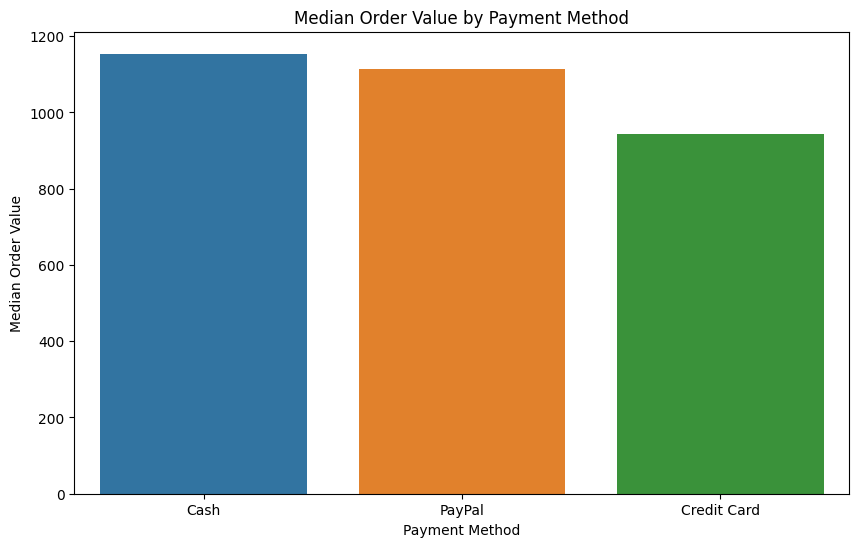

In [21]:
# Calculate the median order value for each payment method
median_order_value_by_payment = df.groupby('PaymentMethod')['TotalAmount'].median().reset_index()

# Sort the data by median order value
median_order_value_by_payment = median_order_value_by_payment.sort_values('TotalAmount', ascending=False)

# Plotting the median order value by payment method
plt.figure(figsize=(10, 6))
sns.barplot(x='PaymentMethod', y='TotalAmount', data=median_order_value_by_payment)
plt.title('Median Order Value by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Median Order Value')
plt.show()

### Returns are like a leak in a boat, and MotionEase wants to plug it. Are there specific categories or payment methods that are more prone to returns? Your findings could help the company tighten its return policy.

In [22]:
# Calculate the return rate for each category
total_orders_by_category = df.groupby('Category')['OrderID'].count().reset_index()
returned_orders_by_category = returned_orders.groupby('Category')['OrderID'].count().reset_index()
return_rate_by_category = pd.merge(total_orders_by_category, returned_orders_by_category, on='Category', how='left')
return_rate_by_category.columns = ['Category', 'TotalOrders', 'ReturnedOrders']
return_rate_by_category['ReturnRate'] = (return_rate_by_category['ReturnedOrders'] / return_rate_by_category['TotalOrders']) * 100

# Calculate the return rate for each payment method
total_orders_by_payment = df.groupby('PaymentMethod')['OrderID'].count().reset_index()
returned_orders_by_payment = returned_orders.groupby('PaymentMethod')['OrderID'].count().reset_index()
return_rate_by_payment = pd.merge(total_orders_by_payment, returned_orders_by_payment, on='PaymentMethod', how='left')
return_rate_by_payment.columns = ['PaymentMethod', 'TotalOrders', 'ReturnedOrders']
return_rate_by_payment['ReturnRate'] = (return_rate_by_payment['ReturnedOrders'] / return_rate_by_payment['TotalOrders']) * 100

# Display the return rates by category and payment method
return_rate_by_category, return_rate_by_payment

(        Category  TotalOrders  ReturnedOrders  ReturnRate
 0    Electronics          336             172   51.190476
 1        Fashion          343             179   52.186589
 2  Home & Garden          321             165   51.401869,
   PaymentMethod  TotalOrders  ReturnedOrders  ReturnRate
 0          Cash          311             176   56.591640
 1   Credit Card          343             170   49.562682
 2        PayPal          346             170   49.132948)